# ADP
***

## 01. 통계분석

### Q1) Urban변수에 따른 Sales의 차이가 있는지를 통계적으로 검증하기 위한 통계분석을 수행하고, 결과를 해석하시오. 
###    (데이터는 정규성을 만족한다고 가정하고 유의수준 0.05 하에서 검정

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy.stats import bartlett, ttest_ind
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('cs.csv')

In [3]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


H0 : urban 변수에 따라 판매량에는 차이가 없다.<br>
H1 : urban 변수에 따라 판매량에는 차이가 있다.

In [5]:
bartlett(df.loc[df.Urban == 'Yes'].Sales, df.loc[df.Urban == 'No'].Sales)

BartlettResult(statistic=0.019034162105407128, pvalue=0.890268591965826)

p-value가 0보다 크기 때문에 등분산성을 만족한다고 볼 수 있다.

In [6]:
ttest_ind(df.loc[df.Urban == 'No'].Sales, df.loc[df.Urban == 'Yes'].Sales)

Ttest_indResult(statistic=0.30765346670661126, pvalue=0.7585069603942775)

수행결과 t-통계량은 0.30765 p-value는 0.7585, 자유도는 398이다. p-value가 유의수준 0.05 보다 크기 때문에 대립가설을 채택한다. 즉 '도시 여부에 따라 판매량에는 차이가 없다'라고 결론을 내릴 수 있다.

***
### Q2)Sales변수와 CompPrice, Income, Advertising, Population, Price, Age, Education 변수들 간에 
###    피어슨 상관계수를 이용한 상관관계 분석을 수행하고 이를 해석하시오.

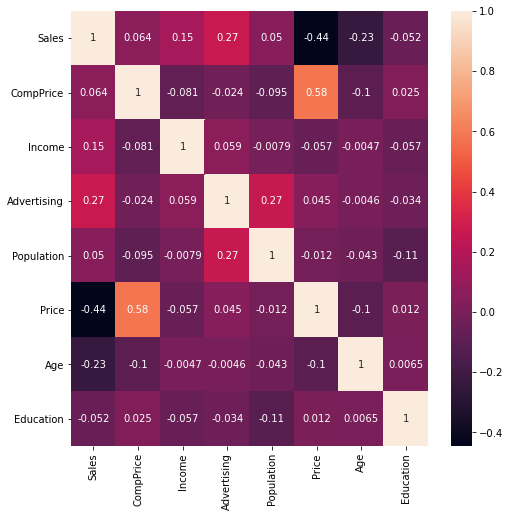

In [7]:
plt.figure(figsize = (8, 8))
sns.heatmap(df[['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']].corr(), annot = True, edgecolor = (0,0,0))
plt.show()

### 1. Sales & CompPrice

In [8]:
corr = stats.pearsonr(df.Sales, df.CompPrice)

In [9]:
print(f'두 변수간의 상관관계는 {np.round(corr[0], 4)}이고 p-value는 {np.round(corr[1], 4)}이다.')

두 변수간의 상관관계는 0.0641이고 p-value는 0.2009이다.


변수간의 상관관계는 0.0641로 매우 약한 상관관계를 띄고 있으며 p-value는 0.2로 통계적으로 유의하다고 볼 수 없다.
***

### 2. Sales & Income

In [10]:
corr = stats.pearsonr(df.Sales, df.Income)

In [11]:
print(f'두 변수간의 상관관계는 {np.round(corr[0], 4)}이고 p-value는 {np.round(corr[1], 4)}이다.')

두 변수간의 상관관계는 0.152이고 p-value는 0.0023이다.


변수간의 상관관계는 0.152로 매우 약한 상관관계를 띄고 있으며 p-value는 0.002로 통계적으로 유의하다고 볼 수 있다.
***

### 3. Sales & Advertising

In [12]:
corr = stats.pearsonr(df.Sales, df.Advertising)

In [13]:
print(f'두 변수간의 상관관계는 {np.round(corr[0], 4)}이고 p-value는 {np.round(corr[1], 4)}이다.')

두 변수간의 상관관계는 0.2695이고 p-value는 0.0이다.


변수간의 상관관계는 0.2695로 매우 약한 상관관계를 띄고 있으며 p-value는 0.00로 통계적으로 유의하다고 볼 수 있다.
***

### 4. Sales & Price

In [14]:
corr = stats.pearsonr(df.Sales, df.Price)

In [15]:
print(f'두 변수간의 상관관계는 {np.round(corr[0], 4)}이고 p-value는 {np.round(corr[1], 4)}이다.')

두 변수간의 상관관계는 -0.445이고 p-value는 0.0이다.


변수간의 상관관계는 -0.445로 약한 음의 상관관계를 띄고 있으며 p-value는 0.00로 통계적으로 유의하다고 볼 수 있다.
***

### 5. Sales & Population

In [16]:
corr = stats.pearsonr(df.Sales, df.Population)

In [17]:
print(f'두 변수간의 상관관계는 {np.round(corr[0], 4)}이고 p-value는 {np.round(corr[1], 4)}이다.')

두 변수간의 상관관계는 0.0505이고 p-value는 0.314이다.


변수간의 상관관계는 0.0505로 상관관계가 거의 없으며 p-value는 0.314로 통계적으로 유의하지 않다고 볼 수 있다.
***

### 6. Sales & Age

In [18]:
corr = stats.pearsonr(df.Sales, df.Age)

In [19]:
print(f'두 변수간의 상관관계는 {np.round(corr[0], 4)}이고 p-value는 {np.round(corr[1], 4)}이다.')

두 변수간의 상관관계는 -0.2318이고 p-value는 0.0이다.


변수간의 상관관계는 -0.2318로 상관관계가 거의 없으며 p-value는 0.0로 통계적으로 유의하다고 볼 수 있다.
***

### 7. Sales & Education

In [20]:
corr = stats.pearsonr(df.Sales, df.Education)

In [21]:
print(f'두 변수간의 상관관계는 {np.round(corr[0], 4)}이고 p-value는 {np.round(corr[1], 4)}이다.')

두 변수간의 상관관계는 -0.052이고 p-value는 0.2999이다.


변수간의 상관관계는 -0.052로 상관관계가 거의 없으며 p-value는 0.2999로 통계적으로 유의하지 않는다고 볼 수 있다.
***

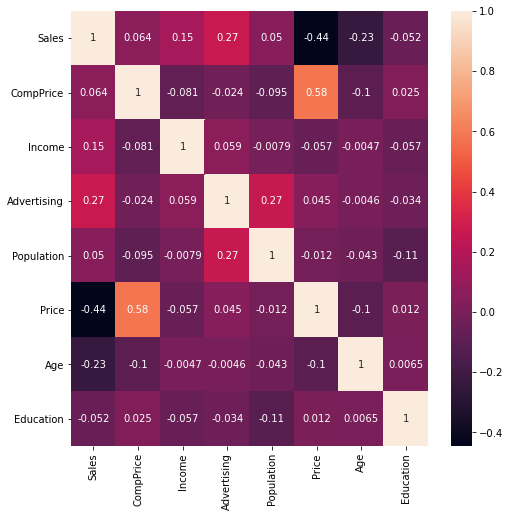

In [22]:
plt.figure(figsize = (8, 8))
sns.heatmap(df[['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']].corr(), annot = True, edgecolor = (0,0,0))
plt.show()

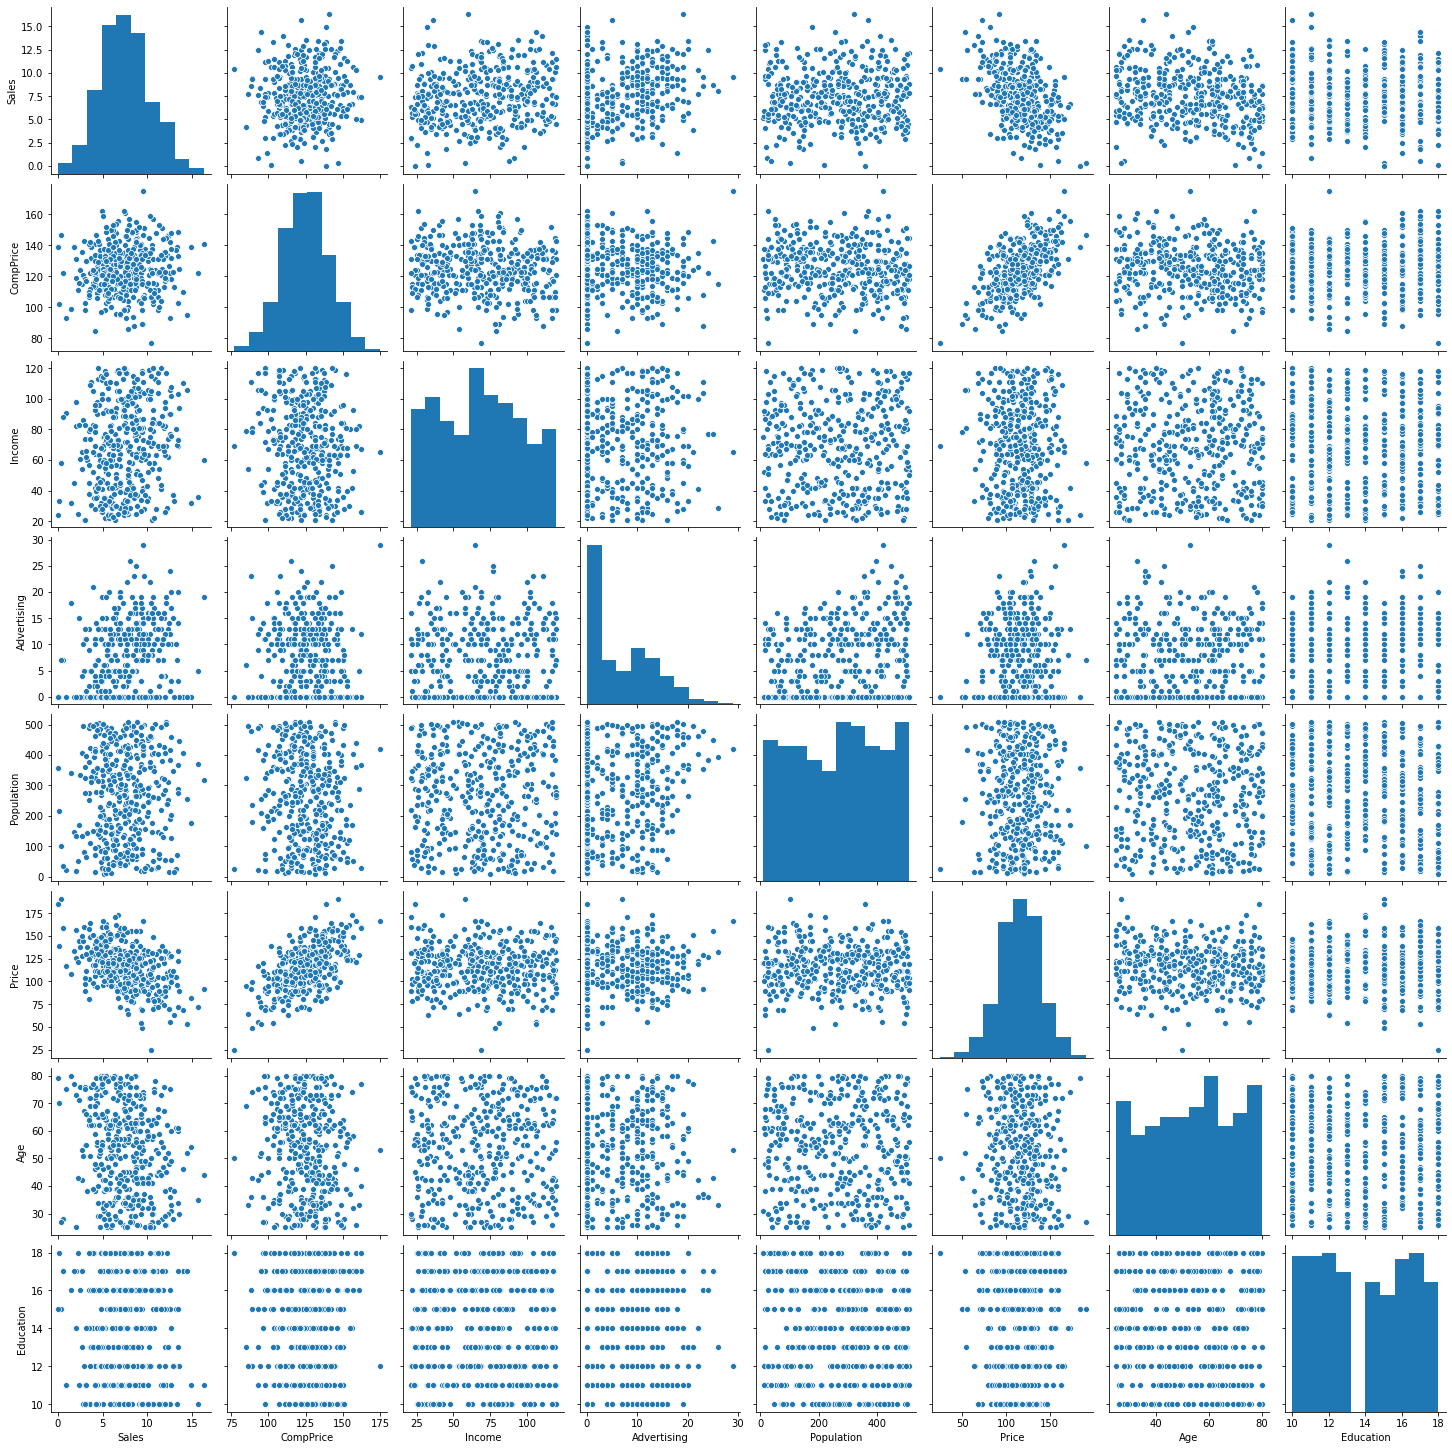

In [23]:
sns.pairplot(df[['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']])
plt.show()             

***
### Q3) 종속변수를 Sales, 독립변수를 CompPrice, Income, Advertising, Population, Price,  Age, Education으로 설정하고 후진제거법을 활용하여 회귀분석을 실시하고, 추정된 회귀식을 작성하시오. 

In [164]:
y = df.Sales
X = df[['CompPrice', 'Income', 'Advertising', 'Price', 'Population', 'Age', 'Education']]

In [165]:
X['constant'] = 1

In [166]:
start_model = sm.OLS(y, X).fit()
start_model.aic

1668.6474655138295

#### step 1

In [167]:
aic_list = []
for n in range(0, 7) :
    target_cols = list(X.columns)
    target_col = target_cols[n]
    del target_cols[n]
    model = sm.OLS(y, X[target_cols]).fit()
    aic = np.round(model.aic, 2)
    aic_list.append(aic)
    print(f'{target_col} 컬럼을 뺐을 때 AIC는 {aic}이다.')
print(f'삭제 필요 컬럼은 {target_cols[np.argmin(aic_list)]}이다.')
target_cols = list(X.columns)
if start_model.aic > np.min(aic_list) :
    del target_cols[np.argmin(aic_list)]
    print('진행')
else :
    print('중단')
model = sm.OLS(y, X[target_cols]).fit()
model.summary()

CompPrice 컬럼을 뺐을 때 AIC는 1791.43이다.
Income 컬럼을 뺐을 때 AIC는 1680.4이다.
Advertising 컬럼을 뺐을 때 AIC는 1736.58이다.
Price 컬럼을 뺐을 때 AIC는 1913.93이다.
Population 컬럼을 뺐을 때 AIC는 1666.68이다.
Age 컬럼을 뺐을 때 AIC는 1720.09이다.
Education 컬럼을 뺐을 때 AIC는 1667.83이다.
삭제 필요 컬럼은 Population이다.
진행


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     77.40
Date:                Fri, 11 Dec 2020   Prob (F-statistic):           1.56e-63
Time:                        13:49:05   Log-Likelihood:                -826.34
No. Observations:                 400   AIC:                             1667.
Df Residuals:                     393   BIC:                             1695.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
CompPrice       0.0941      0.008     12.070      0.000       0.079       0.109
Income          0.0129      0.003      3.717      0.000       0.006       0.020
Advertising     0.1302      0.015      8.929      0.000       0.101       0.159
Price          -0.0926      0.005    -18.352      0.000      -0.102      -0.083
Age            -0.0449      0.006     -7.495      0.000      -0.057      -0.033
Education      -0.0393      0.037     -1.066      0.287      -0.112       0.033
constant        7.6518      1.072      7.135      0.000       5.543       9.760
==============================================================================
Omnibus:                        8.297   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                7.718
Skew:                           0.288   Prob(JB):                       0.0211
Kurtosis:                       2.636   Cond. No.                     2.15e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### step 2

In [168]:
aic_list = []
for n in range(0, 6) :
    target_cols2 = target_cols.copy()
    target_col = target_cols2[n]
    del target_cols2[n]
    #print(target_cols2)
    model = sm.OLS(y, X[target_cols2]).fit()
    aic = np.round(model.aic, 4)
    aic_list.append(aic)
    print(f'{target_col} 컬럼을 뺐을 때 AIC는 {aic}이다.')
del target_cols[np.argmin(aic_list)]
model = sm.OLS(y, X[target_cols]).fit()
model.summary()

CompPrice 컬럼을 뺐을 때 AIC는 1790.8127이다.
Income 컬럼을 뺐을 때 AIC는 1678.504이다.
Advertising 컬럼을 뺐을 때 AIC는 1738.5613이다.
Price 컬럼을 뺐을 때 AIC는 1912.2605이다.
Age 컬럼을 뺐을 때 AIC는 1718.1232이다.
Education 컬럼을 뺐을 때 AIC는 1665.8346이다.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     92.62
Date:                Fri, 11 Dec 2020   Prob (F-statistic):           2.70e-64
Time:                        13:49:05   Log-Likelihood:                -826.92
No. Observations:                 400   AIC:                             1666.
Df Residuals:                     394   BIC:                             1690.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
CompPrice       0.0939      0.008     12.051      0.000       0.079       0.109
Income          0.0131      0.003      3.779      0.000       0.006       0.020
Advertising     0.1306      0.015      8.963      0.000       0.102       0.159
Price          -0.0925      0.005    -18.347      0.000      -0.102      -0.083
Age            -0.0450      0.006     -7.503      0.000      -0.057      -0.033
constant        7.1092      0.944      7.531      0.000       5.253       8.965
==============================================================================
Omnibus:                        9.073   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.154
Skew:                           0.288   Prob(JB):                       0.0170
Kurtosis:                       2.602   Cond. No.                     1.89e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [169]:
aic_list = []
for n in range(0, 5) :
    target_cols2 = target_cols.copy()
    target_col = target_cols2[n]
    del target_cols2[n]
    #print(target_cols2)
    model = sm.OLS(y, X[target_cols2]).fit()
    aic = np.round(model.aic, 4)
    aic_list.append(aic)
    print(f'{target_col} 컬럼을 뺐을 때 AIC는 {aic}이다.')
del target_cols[np.argmin(aic_list)]
model = sm.OLS(y, X[target_cols]).fit()
model.summary()

CompPrice 컬럼을 뺐을 때 AIC는 1789.3472이다.
Income 컬럼을 뺐을 때 AIC는 1678.0742이다.
Advertising 컬럼을 뺐을 때 AIC는 1738.0581이다.
Price 컬럼을 뺐을 때 AIC는 1910.8461이다.
Age 컬럼을 뺐을 때 AIC는 1717.251이다.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     108.6
Date:                Fri, 11 Dec 2020   Prob (F-statistic):           2.58e-62
Time:                        13:49:05   Log-Likelihood:                -834.04
No. Observations:                 400   AIC:                             1678.
Df Residuals:                     395   BIC:                             1698.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
CompPrice       0.0923      0.008     11.665      0.000       0.077       0.108
Advertising     0.1338      0.015      9.048      0.000       0.105       0.163
Price          -0.0929      0.005    -18.111      0.000      -0.103      -0.083
Age            -0.0453      0.006     -7.430      0.000      -0.057      -0.033
constant        8.2445      0.910      9.062      0.000       6.456      10.033
==============================================================================
Omnibus:                        7.926   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                7.350
Skew:                           0.278   Prob(JB):                       0.0254
Kurtosis:                       2.638   Cond. No.                     1.67e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""